# Assignment 1: Color Spaces, Morphological Operators

## Exercise 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put some example images in in /images.

Rough sketch:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



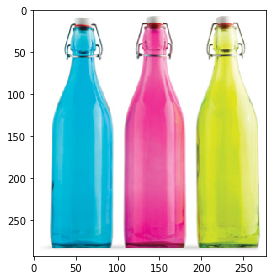

In [1]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image = io.imread('images/bottles.png')
io.imshow(image)



(293, 277, 3)
<class 'numpy.ndarray'>
[255 255 255]


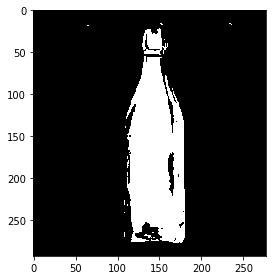

In [2]:
print(image.shape)
print(type(image))

#t_image = np.array(np.asarray(image))
t_image = image

print(t_image[0,0,:])

ranges = [(220,255),(30,150), (120,200)]

red_range = np.logical_and(ranges[0][0] < t_image[:,:,0], t_image[:,:,0] < ranges[0][1])
#print(red_range)
green_range = np.logical_and(ranges[1][0] < t_image[:,:,1], t_image[:,:,1] < ranges[1][1])
blue_range = np.logical_and(ranges[2][0] < t_image[:,:,2], t_image[:,:,2] < ranges[2][1])
valid_range = np.logical_and(red_range, green_range, blue_range)

t_image[valid_range] = 255
t_image[np.logical_not(valid_range)] = 0

io.imshow(t_image)

#outim = Image.fromarray(arr)
#outim.save("rainbowout.jpg")


## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with the two-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

(293, 277, 3)
(293, 277)


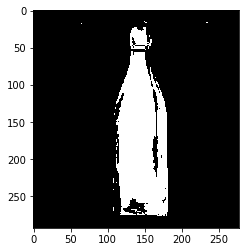

In [3]:
print(t_image.shape)
# 1 dimension binary image
t_image_1dim = t_image[:,:,0]
print(t_image_1dim.shape)

# normalized image
normalized = t_image_1dim[:,:] / 255

plt.imshow(normalized, cmap='gray')


In [4]:
test_image = np.array([[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0],
                       [0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0],
                       [0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
                       [0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],])
test_image2 = np.array([[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0],
                       [0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0],
                       [0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0],
                       [0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                       [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],])
test_image3 = np.array([[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],
                       [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0],])
#print(test_image)
#print(test_image2)
#print(test_image3)

254
68
(294, 277)
(23, 277, 112, 180)


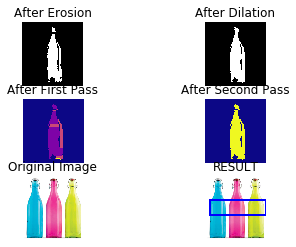

In [5]:
window = np.array([[0.0,1.0,0.0],[1.0,1.0,1.0],[0.0,1.0,0.0]])
windowsum = np.sum(window)


#TODO: padding (crashes if border any pixel has noise)

def erosion(w, wsum, im):
    image_width = im.shape[0]
    image_height = im.shape[1]
    res = np.copy(im)
    
    for i in range(image_width):
        for j in range(image_height):
            
            if(im[i,j] != 0.0):
                temp_im = np.array([[im[i-1,j-1],im[i,j-1],im[i+1,j-1]],
                                    [im[i-1,j],im[i,j],im[i+1,j]],
                                    [im[i-1,j+1],im[i,j+1],im[i+1,j+1]]])
                checksum = np.sum(w*temp_im)
                
                if(checksum != wsum):
                    res[i,j] = 0.0
                    
    return res

def dilation(w, wsum, im):
    image_width = im.shape[0]
    image_height = im.shape[1]
    res = np.copy(im)
    
    for i in range(image_width-2):
        for j in range(image_height-2):
            temp_im = np.array([[im[i,j],im[i+1,j],im[i+2,j]],
                                [im[i,j+1],im[i+1,j+1],im[i+2,j+1]],
                                [im[i,j+2],im[i+1,j+2],im[i+2,j+2]]])
            
            checksum = np.sum(w*temp_im)
            if(checksum != 0.0):
                res[i+1,j+1] = 1.0
    return res


def twopass(im):
    image_width = im.shape[0]
    image_height = im.shape[1]
    conflicts = []
    
    #top-padding
    pad = np.zeros([image_height]).reshape(1,image_height)
    im = np.concatenate((pad, im), axis=0)
    
    #first pass
    for i in range(image_width+1): #+1 because of padding
        lowest_class = 0.0
        for j in range(image_height):
            
            if(im[i,j] != 0.0):
                if(im[i,j-1] == 0.0):
                    if(im[i-1,j] == 0.0):
                        lowest_class = 1.0+lowest_class
                        im[i,j] = lowest_class
                    else:
                        im[i,j] = im[i-1,j]
                        lowest_class = im[i-1,j]
                else:
                    im[i,j] = im[i,j-1]
                    lowest_class = im[i,j-1]
                    
                    #conflict check
                    if((im[i-1,j] != im[i,j-1] and im[i-1,j] != 0.0)):
                        conflicts.append((i,j))
    
    first_pass = np.copy(im)
    first_pass[first_pass == 1.0] = 50.0
    first_pass[first_pass == 2.0] = 100.0
    first_pass[first_pass == 3.0] = 200.0
    #print(first_pass)
    
    #second pass
    for t in conflicts:
        k = t[0]
        l = t[1]
        con1 = im[k,l-1]
        con2 = im[k-1,l]
        replace = min(con1,con2)
        im[im == con2] = con1
    
    #print(im)                    
    return first_pass, im


def bbox(im):
    im_not_null = np.where(im != 0)
    bbox = np.min(im_not_null[0]), np.max(im_not_null[0]), np.min(im_not_null[1]), np.max(im_not_null[1])
    width = np.max(im_not_null[0]) - np.min(im_not_null[0])
    height = np.max(im_not_null[1]) - np.min(im_not_null[1])
    print(width)
    print(height)
    
    #rect = patches.Rectangle((bbox[2],bbox[0]),bbox[1]-bbox[3],bbox[2]-bbox[0],linewidth=1,edgecolor='b',facecolor='none')
    print(im.shape)
    print(bbox)
    return bbox, width, height

def result(im, bbox):
    print(im.shape)
    
    frame = im[bbox[0-2]:bbox[0-2],bbox[0-2]:,:]
    
    return result


im_erosion = erosion(window, windowsum, normalized)
im_dilation = dilation(window, windowsum, im_erosion)
first_pass, second_pass = twopass(im_dilation)
bbox, width, height = bbox(second_pass)
#result = result(image ,bbox)




#Plot
bottles = io.imread('images/bottles.png')
fig, axs = plt.subplots(3, 2)

axs[0, 0].imshow(im_erosion, cmap='gray')
axs[0, 0].set_title('After Erosion')
axs[0, 0].axis('off')

axs[0, 1].imshow(im_dilation, cmap='gray')
axs[0, 1].set_title('After Dilation')
axs[0, 1].axis('off')

axs[1, 0].imshow(first_pass, cmap='plasma')
axs[1, 0].set_title('After First Pass')
axs[1, 0].axis('off')

axs[1, 1].imshow(second_pass, cmap='plasma')
axs[1, 1].set_title('After Second Pass')
axs[1, 1].axis('off')

axs[2, 0].imshow(bottles)
axs[2, 0].set_title('Original Image')
axs[2, 0].axis('off')

rect = patches.Rectangle((bbox[0],bbox[2]),width,height,linewidth=2,edgecolor='b',facecolor='none')
axs[2, 1].add_patch(rect)
axs[2, 1].imshow(bottles)
axs[2, 1].set_title('RESULT')
axs[2, 1].axis('off')


plt.show()

## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)